<h1 align="center">Aprendizado de Máquina - Regressão Polinomial</h1>

Data Scientist Jr.: Karina Gonçalves Soares

link de estudo:

* [Machine Learning - Polynomial Regression]("https://www.w3schools.com/python/python_ml_polynomial_regression.asp")

## Regressão Polinomial

Se seus pontos de dados claramente não se ajustarem a uma regressão linear (uma linha reta que passa por todos os pontos de dados), pode ser ideal para regressão polinomial.

A regressão polinomial, assim como a regressão linear, usa a relação entre as variáveis ​​​​x e y para encontrar a melhor maneira de traçar uma linha através dos pontos de dados.

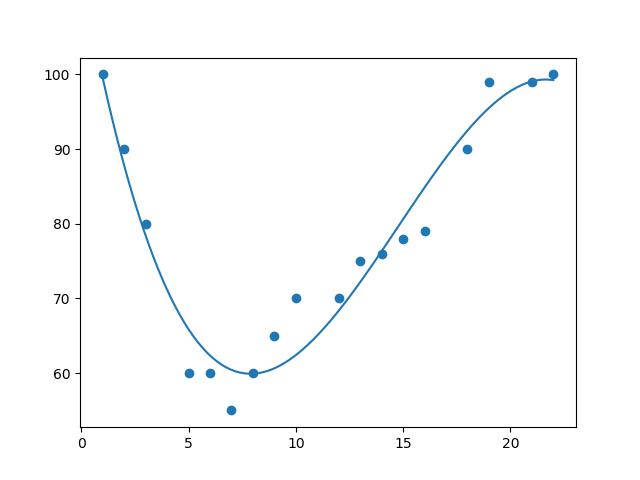

## Como funciona?
Python possui métodos para encontrar um relacionamento entre pontos de dados e desenhar uma linha de regressão polinomial. Mostraremos como usar esses métodos em vez de seguir a fórmula matemática.

No exemplo abaixo, registramos 18 carros ao passarem por um determinado pedágio.

Registramos a velocidade do carro e o horário (hora) em que ocorreu a ultrapassagem.

O eixo x representa as horas do dia e o eixo y representa a velocidade:

### Comece desenhando um gráfico de dispersão:

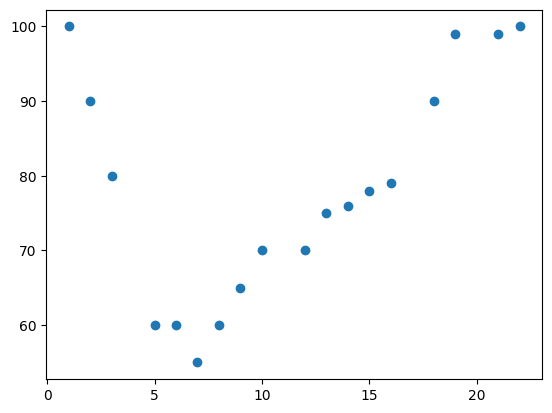

In [1]:
import matplotlib.pyplot as plt

x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

plt.scatter(x, y)
plt.show()

A seguir:

* Utiliza-se a função polyfit do NumPy para realizar um ajuste polinomial de terceiro grau aos dados nas listas x e y. O resultado é armazenado em mymodel, que é um objeto da classe poly1d que representa o polinômio resultante.

* Utiliza-se linspace para gerar 100 pontos igualmente espaçados no intervalo de 1 a 22. Esses pontos são utilizados para traçar a linha de ajuste.

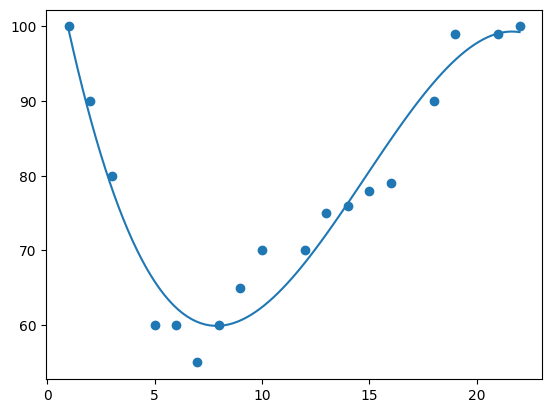

In [5]:
# Importe numpy e matplotlib desenhe a linha de Regressão Polinomial:

import numpy
import matplotlib.pyplot as plt

x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

# NumPy possui um método que nos permite fazer um modelo polinomial:
mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))

# Em seguida, especifique como a linha será exibida, começamos na posição 1 e terminamos na posição 22:
myline = numpy.linspace(1, 22, 100)

# Desenhe o gráfico de dispersão original:
plt.scatter(x, y)
# Desenhe a linha de regressão polinomial:
plt.plot(myline, mymodel(myline))
plt.show()

## R-quadrado
É importante saber quão bem está a relação entre os valores dos eixos x e y; se não houver relação, a regressão polinomial não pode ser usada para prever nada.

A relação é medida com um valor denominado r-quadrado.

O valor de r ao quadrado varia de 0 a 1, onde 0 significa nenhum relacionamento e 1 significa 100% relacionado.

Python e o módulo Sklearn calcularão esse valor para você, tudo o que você precisa fazer é alimentá-lo com os arrays x e y:

In [6]:
# Quão bem meus dados se ajustam em uma regressão polinomial?

import numpy
from sklearn.metrics import r2_score

x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))

print(r2_score(y, mymodel(x)))

0.9432150416451026


Nota: O resultado 0,94 mostra que existe uma relação muito boa, e podemos usar regressão polinomial em previsões futuras.

## Prever Valores Futuros
Agora podemos usar as informações que reunimos para prever valores futuros.

Exemplo: Vamos tentar prever a velocidade de um carro que passa no pedágio por volta das 17h:

Para fazer isso, precisamos do mesmo mymodel array do exemplo acima:

In [7]:
mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))

In [8]:
# Preveja a velocidade de um carro passando às 17h:

import numpy
from sklearn.metrics import r2_score

x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))

speed = mymodel(17)
print(speed)

88.87331269698001


O exemplo previu uma velocidade de 88,87, que também podemos ler no diagrama:

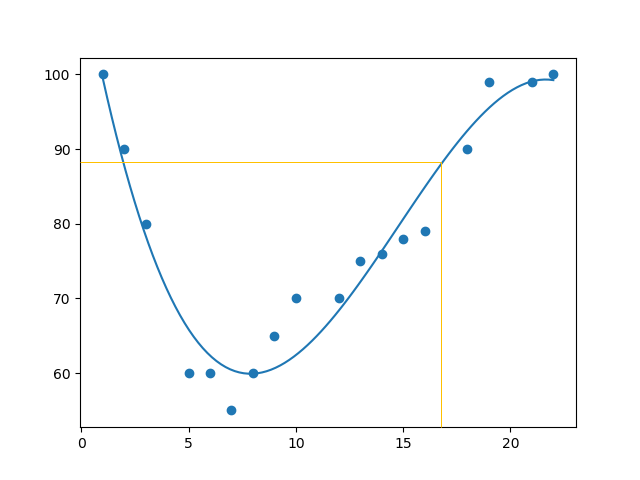

## Ajuste ruim?
Vamos criar um exemplo onde a regressão polinomial não seria o melhor método para prever valores futuros.

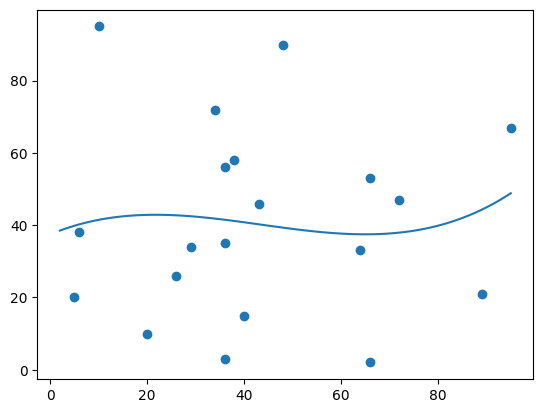

In [9]:
# Esses valores para os eixos x e y devem resultar em um ajuste muito ruim para a regressão polinomial:

import numpy
import matplotlib.pyplot as plt

x = [89,43,36,36,95,10,66,34,38,20,26,29,48,64,6,5,36,66,72,40]
y = [21,46,3,35,67,95,53,72,58,10,26,34,90,33,38,20,56,2,47,15]

mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))

myline = numpy.linspace(2, 95, 100)

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()

## E o valor de r ao quadrado?

In [10]:
# Você deve obter um valor de r ao quadrado muito baixo.

import numpy
from sklearn.metrics import r2_score

x = [89,43,36,36,95,10,66,34,38,20,26,29,48,64,6,5,36,66,72,40]
y = [21,46,3,35,67,95,53,72,58,10,26,34,90,33,38,20,56,2,47,15]

mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))

print(r2_score(y, mymodel(x)))

0.009952707566680652


O resultado: 0,00995 indica um relacionamento muito ruim e nos diz que este conjunto de dados não é adequado para regressão polinomial.